In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
# Import the dataset
import kagglehub as kh
from kagglehub import KaggleDatasetAdapter

df = kh.load_dataset(KaggleDatasetAdapter.PANDAS, "yekahaaagayeham/jamboree-education", "Jamboree Education.csv")
df.head(10)

/tmp/ipykernel_3028/59565415.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kh.load_dataset(KaggleDatasetAdapter.PANDAS, "yekahaaagayeham/jamboree-education", "Jamboree Education.csv")


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [66]:
# Analyze the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


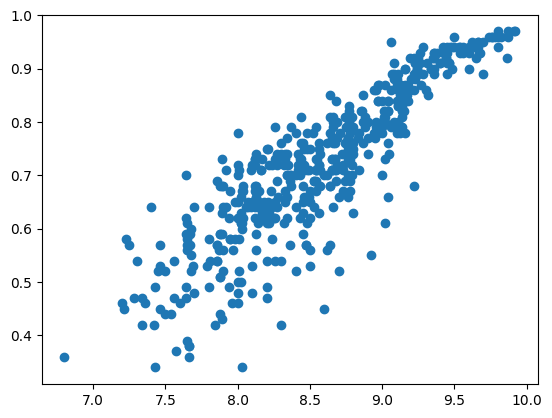

In [67]:
# Consider the columns CGPA and `Chance of Admit` for an univariate linear regression modal
x, y = df["CGPA"], df["Chance of Admit "]
plt.scatter(x, y)
plt.show()

Skewness:  -0.026612517318359303
Correlation:  0.8824125749045737


<Axes: >

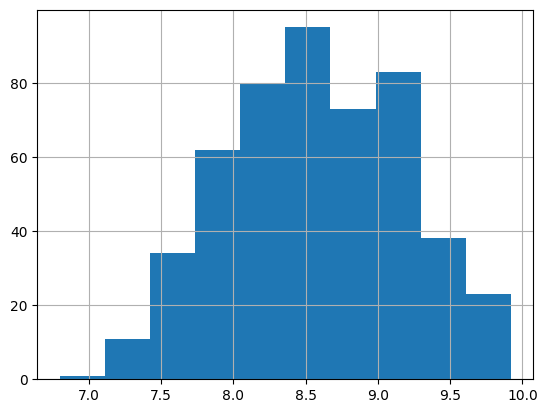

In [69]:
print("Skewness: ", df["CGPA"].skew())
print("Correlation: ",df["CGPA"].corr(df["Chance of Admit "]))
df["CGPA"].hist()

In [70]:
# Prepare the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train = np.array([x_train]).reshape(400, 1)
x_test = np.array([x_test]).reshape(100, 1)
print('x train: ', x_train.shape)
print('x test: ', x_test.shape)

x train:  (400, 1)
x test:  (100, 1)


In [71]:
# Train the univariate linear regression modal
lnr_reg = LinearRegression()
lnr_reg.fit(x_train, y_train)

LinearRegression()

In [72]:
# Test and analyze the modal's performance
y_pred = lnr_reg.predict(x_test)
print('r2: ',r2_score(y_test, y_pred))
print('mse: ', mean_squared_error(y_test, y_pred))

r2:  0.7444433788008283
mse:  0.004463232500088233
